<a href="https://colab.research.google.com/github/rajeshgayathri2003/EVPR/blob/main/shortest_path_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

This code is implemented based on the article: https://towardsdatascience.com/finding-shortest-path-using-q-learning-algorithm-1c1f39e89505


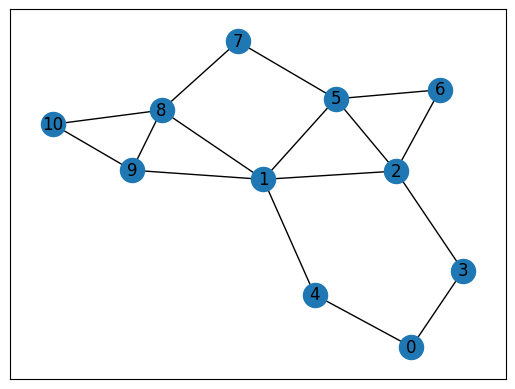

In [3]:
edges = [(0,4), (4,0), (0,3), (3,0), (1,2), (2,1), (1,4), (4,1), (1,8), (8,1), (1,9), (9,1), (2,3), (3,2), (2,6), (6,2), (1,5), (5,1), (2,5), (5,2), (5,6),
(6,5), (7,8), (8,7), (7,5), (5,7), (8,9), (9,8), (8,10), (10,8), (9,10), (10,9)]
G = nx.Graph()
G.add_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
plt.show()

In [4]:
R = np.matrix((np.zeros((11,11))))

for x in G[10]:
  R[x,10] = 100

In [5]:
Q = np.matrix(np.zeros((11,11)))
Q -= 100

for node in G.nodes:
  for x in G[node]:
    Q[node, x] = 0
    Q[x, node] = 0

In [6]:
import pandas as pd


In [8]:
pd.DataFrame(R)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


In [9]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0,0.0,0.0,-100.0
2,-100.0,0.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0
3,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,0.0,0.0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0
8,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,0.0
9,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0


In [10]:
def next_number(start, er):
  random_value = random.uniform(0, 1)
  if random_value < er:
    sample=G[start]

  else:
    sample = np.where(Q[start,]==np.max(Q[start,]))[1]

  next_node = int(np.random.choice(sample, 1))
  return next_node



In [11]:
def updateQ(node1, node2, lr, discount):
  max_index = np.where(Q[node2,]==np.max(Q[node2,]))[1]

  if max_index.shape[0] > 1:
    max_index = int(np.random.choice(max_index, size=1))
  else:
    max_index = int(max_index)

  max_value = Q[node2, max_index]

  Q[node1, node2] = int((1-lr) * Q[node1, node2] + lr * (R[node1, node2] + discount * max_value))

In [16]:
import tqdm

In [19]:
def learn(er, lr, discount):
  for i in tqdm.tqdm(range(50000)):
    start_node = int(np.random.choice(G.nodes, 1))
    next_node = next_number(start_node, er)
    updateQ(start_node, next_node, lr, discount)

In [20]:
learn(0.5, 0.8, 0.8)

  0%|          | 0/50000 [00:00<?, ?it/s]<ipython-input-19-76e5d3248d2a>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start_node = int(np.random.choice(G.nodes, 1))
<ipython-input-10-89f66bc98499>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_node = int(np.random.choice(sample, 1))
<ipython-input-11-aee89ad9355e>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size=1))
<ipython-input-11-aee89ad9355e>:7: Depre

In [21]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,10
0,-100.0,-100.0,-100.0,110.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,138.0,-100.0,138.0,138.0,-100.0,-100.0,218.0,218.0,-100.0
2,-100.0,174.0,-100.0,110.0,-100.0,138.0,110.0,-100.0,-100.0,-100.0,-100.0
3,110.0,-100.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,110.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,174.0,138.0,-100.0,-100.0,-100.0,110.0,174.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,138.0,-100.0,-100.0,138.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,138.0,-100.0,-100.0,218.0,-100.0,-100.0
8,-100.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,174.0,-100.0,218.0,274.0
9,-100.0,174.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,218.0,-100.0,274.0


In [22]:
def shortest_path(begin, end):
  path = [begin]
  next_node = np.argmax(Q[begin,])
  while next_node != end:
    path.append(next_node)
    next_node = np.argmax(Q[next_node,])
  path.append(end)
  return path

In [26]:
shortest_path(3,10)

[3, 2, 1, 8, 10]